In [1]:
#Import files and packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#check working directory
os.getcwd()
os.chdir('C:\\Users\\colli\\OneDrive\\Desktop\\Kaggle\\Ramen')
os.getcwd()

'C:\\Users\\colli\\OneDrive\\Desktop\\Kaggle\\Ramen'

In [3]:
#Load Data 
ramen_data=pd.read_csv("ramen-ratings.csv")

In [4]:
#Data exploration
ramen_data.describe(include='all')

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
count,2580.000000,2580,2580,2578,2580,2580,41
unique,NaN,355,2413,7,38,51,38
top,NaN,Nissin,Beef,Pack,Japan,4,\n
freq,NaN,381,7,1531,352,384,4
mean,1290.500000,NaN,NaN,NaN,NaN,NaN,NaN
std,744.926171,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,645.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1290.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1935.250000,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Noticed that style has 2 missing values
ramen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [6]:
#Previewing the data
ramen_data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [7]:
#Replaced the missing Ramen Styles with None
ramen_data['Style']=ramen_data['Style'].fillna('None')

In [8]:
#Reordered dataframe by Brands into a descending order
ramen_data.sort_values(by='Brand', ascending=True)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
229,2351,1 To 3 Noodles,Chatpat Masala,Pack,India,4,NaN
456,2124,7 Select,Nissin Instant Noodles Tom Yum Seafood Creamy ...,Bowl,Thailand,3.5,NaN
463,2117,7 Select,Nissin Instant Noodles Shrimp Ma Nao Lui Suan ...,Bowl,Thailand,4,NaN
877,1703,7 Select/Nissin,Super Tom Yum Shrimp,Cup,Thailand,3.5,NaN
911,1669,A-One,Mi Ly Instant Noodles Mi Chay Vegetarian Flavor,Cup,Vietnam,1.25,NaN
...,...,...,...,...,...,...,...
823,1757,iMee,Instant Noodles Beef Flavour,Pack,Netherlands,3.25,NaN
662,1918,iMee,Instant Noodles chicken Flavour,Pack,Netherlands,3.5,NaN
797,1783,iMee,Instant Noodles Creamy Tom Yum Shrimp Flavour,Pack,Netherlands,4.5,NaN
2135,445,iNoodle,Taiwan Style Chow Mein,Pack,Taiwan,2.25,NaN


In [9]:
#Noticed that some Brands were not spelled in the same manner. 
#ex.) Goku Uma -> Goku Uma
ramen_data_brand=ramen_data['Brand'].unique()
print(sorted((ramen_data_brand)))

['1 To 3 Noodles', '7 Select', '7 Select/Nissin', 'A-One', 'A-Sha Dry Noodle', 'A1', 'ABC', 'Acecook', 'Adabi', 'Ah Lai', 'Ajinatori', 'Amianda', 'Amino', "Annie Chun's", 'Aroi', 'Asia Gold', 'Asian Thai Foods', 'Authentically Asian', 'Azami', 'Baijia', 'Baixiang Noodles', 'Baltix', 'Bamee', 'Batchelors', 'Binh Tay', 'Bon Go Jang', 'Bonasia', 'Boss', 'CJ CheilJedang', "Campbell's", 'Cap Atoom Bulan', 'CarJEN', "Chaudhary's Wai Wai", 'Chencun', 'Chering Chang', 'Chewy', 'Chikara', 'China Best', "Ching's Secret", 'Chorip Dong', 'ChoripDong', 'Choumama', 'Chuan Wei Wang', 'Cintan', 'Conimex', 'Crystal Noodle', 'Curry Prince', 'Daddy', 'Daifuku', 'Daikoku', 'Daraz', 'Deshome', 'Doll', 'Dongwon', "Dr. McDougall's", 'Dragonfly', 'Dream Kitchen', 'E-Zee', 'E-mi', 'Eat & Go', 'Econsave', 'Emart', 'FMF', 'Fantastic', "Farmer's Heart", 'Fashion Food', 'Fashion Foods', 'Foodmon', 'Forest Noodles', 'Fortune', 'Four Seas', 'Fu Chang Chinese Noodle Company', 'Fuji Mengyo', 'Fujiwara', 'Fuku', 'GGE',

In [10]:
#Fixed the naming of brands
ramen_data.loc[ramen_data['Brand'] == 'Goku-Uma', 'Brand'] ='Goku Uma'
ramen_data.loc[ramen_data['Brand'] == 'Lishan', 'Brand'] ='Lishan Food Manufacturing'
ramen_data.loc[ramen_data['Brand'] == 'MAMA', 'Brand'] ='Mama'
ramen_data.loc[ramen_data['Brand'] == 'Prima', 'Brand'] ='Prima Taste'
ramen_data.loc[ramen_data['Brand'] == 'Sakurai', 'Brand'] ='Sakurai Foods'
ramen_data.loc[ramen_data['Brand'] == 'Samyang', 'Brand'] ='Samyang Foods'
ramen_data.loc[ramen_data['Brand'] == 'Unif Tung-I', 'Brand'] ='Unif / Tung-I'
ramen_data.loc[ramen_data['Brand'] == 'Wu-Mu', 'Brand'] ='Wu Mu'

In [11]:
#Noticed that there were Unrated Ramens, gave them a rating of 0
ramen_data['Stars'].unique()


array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [12]:
#Investigated the Top Ten Column

ramen_data_copy=ramen_data
ramen_data_copy['Top Ten'].unique()


array([nan, '2016 #10', '2016 #1', '2016 #8', '2016 #5', '2016 #9',
       '2016 #7', '2015 #10', '2015 #7', '2015 #4', '2015 #9', '2015 #6',
       '2015 #1', '2013 #10', '2015 #8', '2014 #7', '2014 #4', '2014 #9',
       '2014 #10', '2014 #8', '2014 #5', '2014 #6', '2014 #1', '2013 #1',
       '2013 #2', '2013 #4', '\n', '2013 #9', '2013 #3', '2012 #10',
       '2012 #7', '2012 #5', '2012 #3', '2012 #6', '2012 #9', '2012 #1',
       '2012 #2', '2013 #6', '2012 #4'], dtype=object)

In [13]:
#Identified the values within the Top Ten Column, most of the rated ramen were not classified as a Top Ten
#created a new column to indicate which ones qualified in the Top Tens.
ramen_data.loc[(ramen_data['Top Ten'].notna()), 'Top_Ten'] = 1
ramen_data.loc[(ramen_data['Top Ten'].isna()), 'Top_Ten'] = 0
ramen_data_copy['Top_Ten'].value_counts()

0.0    2539
1.0      41
Name: Top_Ten, dtype: int64

In [14]:
#Converted the 'Stars' column to numeric
ramen_data.loc[ramen_data['Stars'] == 'Unrated', 'Stars'] = '0'
ramen_data['Stars'] = pd.to_numeric(ramen_data['Stars'])
ramen_data['Stars'].describe()

count    2580.000000
mean        3.650426
std         1.022358
min         0.000000
25%         3.250000
50%         3.750000
75%         4.250000
max         5.000000
Name: Stars, dtype: float64

In [15]:
#Found out the distribution of total ramen ratings in each bin.
#appears that 29.36% are rated between 3.5~4.
#appears that 20% are rated between 3.0~3.5.
#appears that 17.64% are rated between 4.5~5.
#If we assume that all ramen within the 2.5~3.0 star rating are okay, that would mean at 67% of the rated ramen are
#above average.
count_of_stars= pd.cut(ramen_data['Stars'],bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
count_of_stars.value_counts(normalize=True)

(3.5, 4.0]    0.293610
(3.0, 3.5]    0.200314
(4.5, 5.0]    0.176401
(4.0, 4.5]    0.111329
(2.5, 3.0]    0.104273
(1.5, 2.0]    0.037632
(2.0, 2.5]    0.036064
(1.0, 1.5]    0.019208
(0.5, 1.0]    0.010976
(0.0, 0.5]    0.010192
Name: Stars, dtype: float64

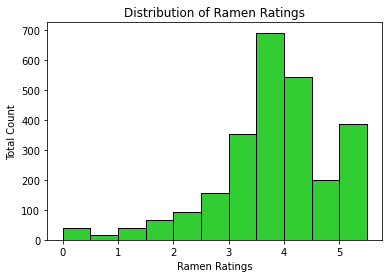

In [16]:
#See the distribution of the Ramen Ratings.

plt.grid(False)
plt.style.use('tableau-colorblind10')
plt.hist(ramen_data['Stars'],bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5], color='limegreen', edgecolor='black')
plt.xlabel('Ramen Ratings')
plt.ylabel('Total Count')
plt.title('Distribution of Ramen Ratings')
plt.show()

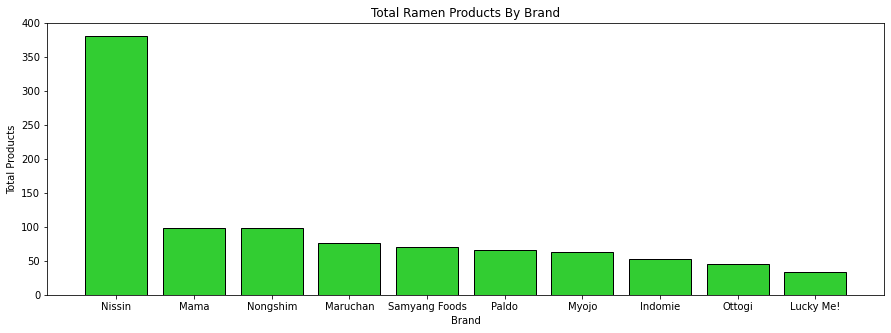

In [17]:
#Wanted to see which brands are the top 10 producers of ramen. Nissin is the biggest producer of ramen, 
#followed by Mama & Nongshim
ramen_brand_counts=ramen_data['Brand'].value_counts().head(10)
labels = ['Nissin','Mama','Nongshim','Maruchan','Samyang Foods','Paldo','Myojo','Indomie','Ottogi','Lucky Me!']


plt.figure(figsize=(15,5))
plt.bar(labels,ramen_brand_counts,color='limegreen',edgecolor='black')
plt.grid(False)
plt.xlabel('Brand')
plt.ylabel('Total Products')
plt.title('Total Ramen Products By Brand')

plt.show()



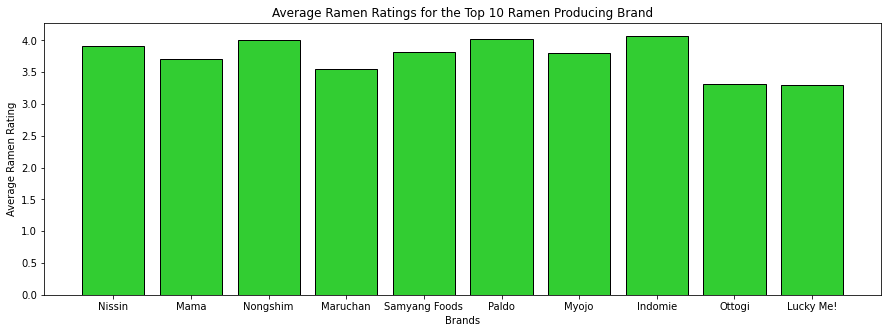

In [18]:
#Wanted to the average rating for the top 10 Ramen producers.
#The top 8 ramen producing companies have an average ramen rating of 3.5+.
#Also Nissin, does not have the highest average ramen rating, despite being the top producer.
labels = ['Nissin','Mama','Nongshim','Maruchan','Samyang Foods','Paldo','Myojo','Indomie','Ottogi','Lucky Me!']

Nissin = ramen_data.loc[ramen_data.Brand == 'Nissin']['Stars'].mean()
Mama = ramen_data.loc[ramen_data.Brand == 'Mama']['Stars'].mean()
Nongshim = ramen_data.loc[ramen_data.Brand == 'Nongshim']['Stars'].mean()
Maruchan = ramen_data.loc[ramen_data.Brand == 'Maruchan']['Stars'].mean()
Samyang_Foods = ramen_data.loc[ramen_data.Brand == 'Samyang Foods']['Stars'].mean()
Paldo = ramen_data.loc[ramen_data.Brand == 'Paldo']['Stars'].mean()
Myojo = ramen_data.loc[ramen_data.Brand == 'Myojo']['Stars'].mean()
Indomie = ramen_data.loc[ramen_data.Brand == 'Indomie']['Stars'].mean()
Ottogi = ramen_data.loc[ramen_data.Brand == 'Ottogi']['Stars'].mean()
Lucky_Me = ramen_data.loc[ramen_data.Brand == 'Lucky Me!']['Stars'].mean()

plt.figure(figsize=(15,5))

plt.xlabel('Brands')
plt.ylabel('Average Ramen Rating')
plt.title('Average Ramen Ratings for the Top 10 Ramen Producing Brand')
plt.bar(labels,[Nissin,Mama,Nongshim,Maruchan,Samyang_Foods,Paldo,Myojo,Indomie,Ottogi,Lucky_Me],color='limegreen',
       edgecolor='black')
plt.grid(False)
plt.show()

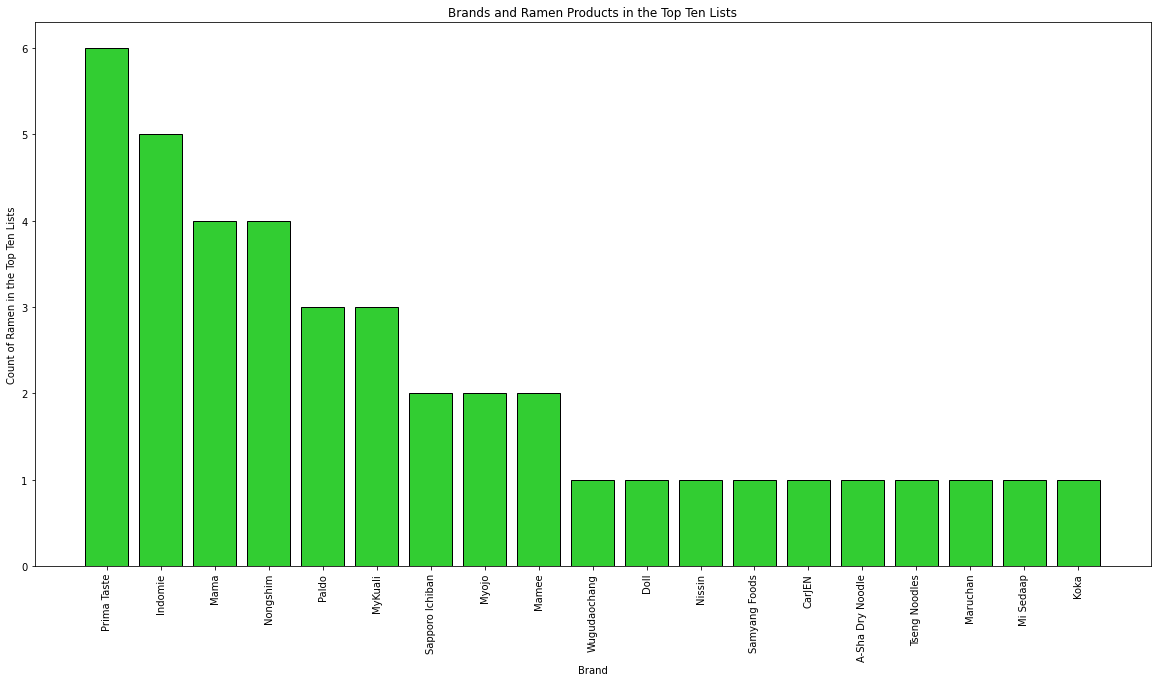

In [19]:
#created a new dataframe that consists of only ramen that made it on top ten lists
# Made a barchart to see which Brands had the most products that made it on the top ten lists
# The top three in a descending order: Prima Taste, Indomie and then Mama.
# One thing to take into consideration is that each Brand may produce ramen from different countries,
#this chart does not account for this fact.
ramen_data_only_tt=ramen_data[(ramen_data['Top_Ten']==1)]
ramen_data_only_tt['Brand'].unique()
labels =['Prima Taste', 'Indomie', 'Mama', 'Nongshim','Paldo','MyKuali','Sapporo Ichiban','Myojo','Mamee',
         'Wugudaochang','Doll','Nissin','Samyang Foods','CarJEN','A-Sha Dry Noodle','Tseng Noodles', 'Maruchan',
         'Mi Sedaap', 'Koka']
ramen_data_only_tt_counts=ramen_data_only_tt['Brand'].value_counts(sort=True)


plt.figure(figsize=(20,10))
plt.ylabel('Count of Ramen in the Top Ten Lists')
plt.xlabel('Brand')
plt.title('Brands and Ramen Products in the Top Ten Lists')
plt.xticks(rotation=90)
plt.bar(labels,ramen_data_only_tt_counts, color='limegreen',edgecolor='black')
plt.grid(False)
plt.show()


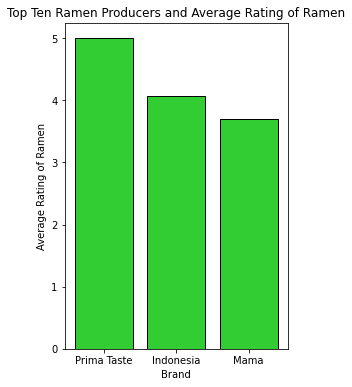

In [20]:
#Find average rating of these 3 Brands that are renowned for top ten ramen.
#Surprisingly Prima Taste has the maximum rating of 5 for the average rating of its ramen.
#Indomie has an average rating of 4, while Mama has 3.7.
#Based on this information, I assume that Prima Taste is seeking to produce higher quality ramen instead of rushing
#out the total quantity of ramen products.
Prima_Taste=ramen_data.loc[ramen_data.Brand == 'Prima Taste']['Stars'].mean()
Indomie=ramen_data.loc[ramen_data.Brand == 'Indomie']['Stars'].mean()
Mama=ramen_data.loc[ramen_data.Brand == 'Mama']['Stars'].mean()


labels =['Prima Taste','Indonmie','Mama']

plt.figure(figsize=(4,6))
plt.bar(labels,[Prima_Taste,Indomie,Mama], color='limegreen',edgecolor='black')
plt.grid(False)
plt.xlabel('Brand')
plt.ylabel('Average Rating of Ramen')
plt.title('Top Ten Ramen Producers and Average Rating of Ramen')


plt.show()

In [21]:
ramen_data.loc[ramen_data.Brand == 'Prima Taste']['Stars'].value_counts()

5.0    11
Name: Stars, dtype: int64

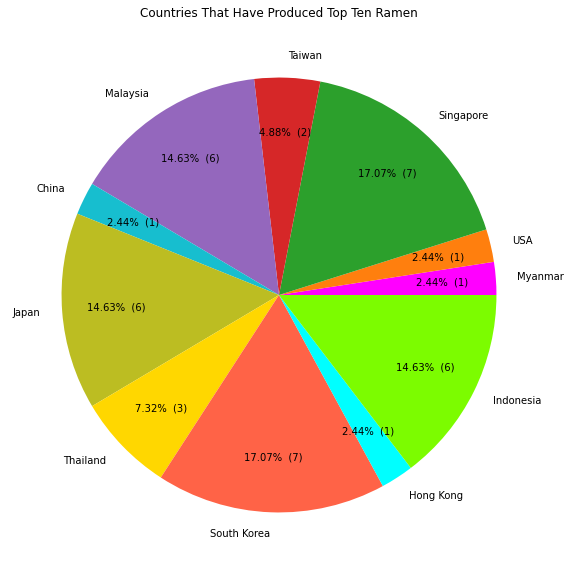

In [22]:
#Did a pie chart to see where which countries produced top ten ramens.
#Shows each country's count of top ten ramen and percentage that it contributes to the total.
#Surprising Singapore and South Korea are tied at first place with 7 top ten rated ramens.
#Japan, Malaysia, and Indonesia are tied for second place

#Count of top ten ramen created in each country
Myanmar=ramen_data_only_tt.loc[ramen_data_only_tt['Country']=='Myanmar'].count()[0]
Singapore=ramen_data_only_tt.loc[ramen_data_only_tt['Country']=='Singapore'].count()[0]
Taiwan=ramen_data_only_tt.loc[ramen_data_only_tt['Country']=='Taiwan'].count()[0]
China=ramen_data_only_tt.loc[ramen_data_only_tt['Country']=='China'].count()[0]
USA=ramen_data_only_tt.loc[ramen_data_only_tt['Country']=='USA'].count()[0]
Malaysia=ramen_data_only_tt.loc[ramen_data_only_tt['Country']=='Malaysia'].count()[0]
Japan=ramen_data_only_tt.loc[ramen_data_only_tt['Country']=='Japan'].count()[0]
Thailand=ramen_data_only_tt.loc[ramen_data_only_tt['Country']=='Thailand'].count()[0]
South_Korea=ramen_data_only_tt.loc[ramen_data_only_tt['Country']=='South Korea'].count()[0]
Indonesia=ramen_data_only_tt.loc[ramen_data_only_tt['Country']=='Indonesia'].count()[0]
Hong_Kong=ramen_data_only_tt.loc[ramen_data_only_tt['Country']=='Hong Kong'].count()[0]

values = [Myanmar,Singapore,Taiwan,China,USA,Malaysia,Japan,Thailand,South_Korea,Indonesia,Hong_Kong]
labels = ['Myanmar','USA','Singapore','Taiwan','Malaysia','China','Japan','Thailand','South Korea',
          'Hong Kong','Indonesia']
explode = (0.2,0,0.1,0.4,0.6,0,0,0,0,0,0.4)

def new_autopct(values):
    def percentage_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return percentage_autopct

colours = ['magenta','tab:orange','tab:green','tab:red','tab:purple','tab:cyan','tab:olive','gold','tomato',
         'aqua','lawngreen']

plt.figure(figsize=(10,10))
plt.pie([Myanmar,USA,Singapore,Taiwan,Malaysia,China,Japan,Thailand,South_Korea,Hong_Kong,Indonesia],labels=labels,
        autopct=new_autopct(values), pctdistance=0.75,colors=colours)
plt.title('Countries That Have Produced Top Ten Ramen')
plt.show()


In [23]:
#I wanted to see which styles of ramen are produced the most.
#Pack is the most popular, followed by Bowl and Cup.
ramen_data['Style'].value_counts(normalize=True)

Pack    0.593411
Bowl    0.186434
Cup     0.174419
Tray    0.041860
Box     0.002326
None    0.000775
Can     0.000388
Bar     0.000388
Name: Style, dtype: float64

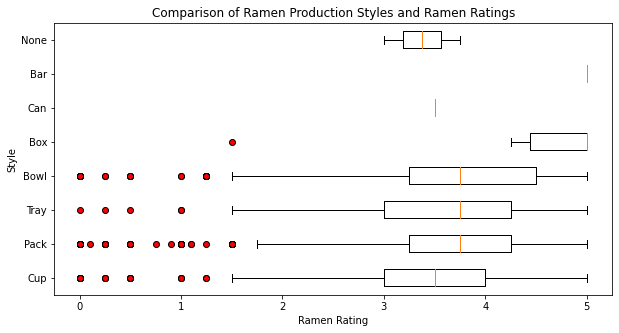

In [24]:
#Decided to see if different styles of ramen affected the star rating.
# Pack, Bowl, Cup are the most produced styles and there doesn't appear to be much influence on the rating.
# Pack probably has more outliers than the other 2 styles because it is the most produced style.
ramen_data['Style'].unique()

plt.figure(figsize=(10,5))
labels =['Cup','Pack','Tray','Bowl','Box','Can','Bar','None']

Cup = ramen_data.loc[ramen_data.Style == 'Cup']['Stars']
Pack = ramen_data.loc[ramen_data.Style == 'Pack']['Stars']
Tray = ramen_data.loc[ramen_data.Style == 'Tray']['Stars']
Bowl = ramen_data.loc[ramen_data.Style == 'Bowl']['Stars']
Box = ramen_data.loc[ramen_data.Style == 'Box']['Stars']
Can = ramen_data.loc[ramen_data.Style == 'Can']['Stars']
Bar = ramen_data.loc[ramen_data.Style == 'Bar']['Stars']
NaN = ramen_data.loc[ramen_data.Style == 'None']['Stars']

outliers = dict(markerfacecolor='r',marker='o')
plt.title('Comparison of Ramen Production Styles and Ramen Ratings')
plt.ylabel('Style')
plt.xlabel('Ramen Rating')


plt.boxplot([Cup,Pack,Tray,Bowl,Box,Can,Bar,NaN], labels=labels, vert=False, flierprops=outliers)
plt.grid(False)
plt.show()

In [25]:
#Created new columns to practice Machine Learning Binary Classification

#Binary 
#If a ramen has a rating of 3.5 or higher it gets a value of 1 else it is 0.

ramen_data['Buy/Pass'] = [1 if x >= 3.5 else 0 for x in ramen_data['Stars']]
ramen_data=ramen_data.drop(['Top Ten', 'Top_Ten'], axis=1)

In [26]:
ramen_data.head()


,Review #,Brand,Variety,Style,Country,Stars,Buy/Pass
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,1
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,0
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,1


In [27]:
from sklearn import preprocessing
data_binary = ramen_data.apply(preprocessing.LabelEncoder().fit_transform)

In [28]:
Xb = data_binary.drop(['Review #','Buy/Pass'], axis=1)
yb = data_binary['Buy/Pass']

#Split the data for training and testing

from sklearn.model_selection import train_test_split
Xb_train,Xb_test,yb_train,yb_test = train_test_split(Xb,yb, test_size=0.2, random_state=42)


# Logistic Regression Binary Classification

In [29]:
#Import logistic regression model and scale the data


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
logreg = LogisticRegression(random_state =42)

#Fitting the scaled data into logistic regression model
Xb = scale(Xb)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.2, random_state=42)
logreg.fit(Xb_train,yb_train)

yb_logreg_pred =logreg.predict(Xb_test)


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yb_test,yb_logreg_pred)

array([[141,   1],
       [  0, 374]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report

print(classification_report(yb_test,yb_logreg_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       142
           1       1.00      1.00      1.00       374

    accuracy                           1.00       516
   macro avg       1.00      1.00      1.00       516
weighted avg       1.00      1.00      1.00       516



# KNearestNeighbors Binary Classification

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xb_train,yb_train)

KNeighborsClassifier()

In [33]:
yb_knn_pred = knn.predict(Xb_test)

In [34]:
confusion_matrix(yb_test,yb_knn_pred)

array([[120,  22],
       [  6, 368]], dtype=int64)

In [35]:
print(classification_report(yb_test,yb_knn_pred))


              precision    recall  f1-score   support

           0       0.95      0.85      0.90       142
           1       0.94      0.98      0.96       374

    accuracy                           0.95       516
   macro avg       0.95      0.91      0.93       516
weighted avg       0.95      0.95      0.94       516



In [36]:
from sklearn.model_selection import cross_val_score

#Find Max distance
k_range = range(1,51)
k_scores =[]
#loop through reasonable values of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn,Xb,yb,cv= 10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9503875968992249, 0.9426356589147288, 0.9507751937984497, 0.9496124031007751, 0.9515503875968992, 0.9546511627906977, 0.9550387596899226, 0.9581395348837208, 0.9531007751937984, 0.9562015503875969, 0.9534883720930232, 0.9565891472868217, 0.9565891472868217, 0.9589147286821706, 0.95, 0.9523255813953488, 0.9507751937984494, 0.9527131782945737, 0.9492248062015503, 0.95, 0.9453488372093023, 0.9507751937984498, 0.9434108527131784, 0.948062015503876, 0.9426356589147286, 0.9472868217054262, 0.9422480620155038, 0.9461240310077518, 0.944186046511628, 0.9453488372093023, 0.9410852713178295, 0.9437984496124031, 0.9399224806201552, 0.9414728682170544, 0.9375968992248062, 0.9406976744186046, 0.9356589147286822, 0.9403100775193799, 0.9356589147286822, 0.938372093023256, 0.9333333333333336, 0.936046511627907, 0.9325581395348838, 0.9364341085271317, 0.9302325581395348, 0.9325581395348838, 0.9267441860465115, 0.9313953488372093, 0.9263565891472869, 0.9282945736434108]


In [37]:
k=pd.DataFrame(k_scores,columns= ['distance'])
k[k['distance']== k['distance'].max()]

,distance
13,0.958915


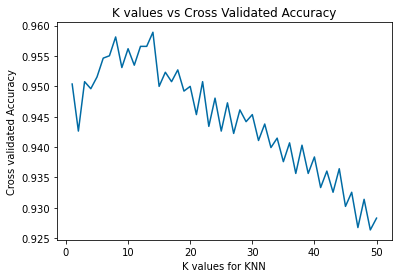

In [38]:
plt.plot(k_range,k_scores)
plt.title('K values vs Cross Validated Accuracy')
plt.xlabel('K values for KNN')
plt.ylabel('Cross validated Accuracy')
plt.show()


In [39]:
knn = KNeighborsClassifier(n_neighbors= 12)
knn.fit(Xb_train,yb_train)

KNeighborsClassifier(n_neighbors=12)

In [40]:
yb_knn_pred = knn.predict(Xb_test)

In [41]:
confusion_matrix(yb_test,yb_knn_pred)

array([[127,  15],
       [  3, 371]], dtype=int64)

In [42]:
print(classification_report(yb_test,yb_knn_pred))


              precision    recall  f1-score   support

           0       0.98      0.89      0.93       142
           1       0.96      0.99      0.98       374

    accuracy                           0.97       516
   macro avg       0.97      0.94      0.96       516
weighted avg       0.97      0.97      0.96       516

